# Configuração inicial

In [1]:
# Instala versão mais recente da biblioteca matplotlib disponível no Colab no momento de criação deste arquivo.
# Essa versão é necessária para usar a função `Axes.bar_labels`.
# Na primeira vez em que for instalado na sessão, precisará reiniciar o runtime
!pip install matplotlib==3.5.3 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
## Carrega bibliotecas utilizadas

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D

from IPython.display import display, Markdown

In [3]:
## Verifica a versão da matplotlib instalada
mpl.__version__

'3.5.3'

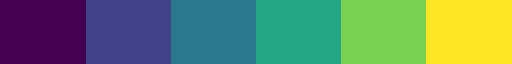

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [4]:
# Define paleta de cores

# # alternativa A: definição manual das cores a partir de lista de cores em hex
# coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

# plt.rcdefaults() # Restaura a configuração default

# Carrega e prepara dados

In [5]:
# Dados dos países do G20 (includindo Espanha, excluindo União Europaia) obtidos do Banco Mundial:
# https://databank.worldbank.org/G20-pop-gdp-imp-exp-gini/id/d0bc168d
    
# Carrrega dados brutos do G20
G20 = pd.read_csv("https://raw.githubusercontent.com/simonedjb/ccec-vis-info-pub/main/dados/G20-WorldDev-02.csv", 
                  na_values="..",
                  skipfooter=5,
                  engine="python").drop(columns="Series Code")

# Examina o dataframe carregado
G20

,Country Name,Country Code,Series Name,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Argentina,ARG,GDP (current US$),5.459824e+11,5.520251e+11,5.263197e+11,5.947493e+11,5.575314e+11,6.436287e+11,5.248197e+11,4.528184e+11,3.895910e+11,4.914927e+11
1,Argentina,ARG,GDP growth (annual %),-1.026420e+00,2.405324e+00,-2.512615e+00,2.731160e+00,-2.080328e+00,2.818503e+00,-2.617396e+00,-2.025934e+00,-9.895269e+00,1.026376e+01
2,Argentina,ARG,GDP per capita growth (annual %),-2.145284e+00,1.265685e+00,-3.578581e+00,1.629664e+00,-3.110064e+00,1.757648e+00,-3.601610e+00,-2.994388e+00,-1.076511e+01,9.223956e+00
3,Argentina,ARG,GDP per capita (current US$),1.308266e+04,1.308025e+04,1.233480e+04,1.378906e+04,1.279024e+04,1.461304e+04,1.179516e+04,1.007636e+04,8.585695e+03,1.072923e+04
4,Argentina,ARG,Imports of goods and services (% of GDP),1.428868e+01,1.471676e+01,1.400132e+01,1.178057e+01,1.356679e+01,1.396932e+01,1.632585e+01,1.451850e+01,1.355632e+01,1.512831e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,United States,USA,Imports of goods and services (current US$),2.769317e+12,2.766375e+12,2.887445e+12,2.794850e+12,2.738359e+12,2.923691e+12,3.129697e+12,3.115990e+12,2.774597e+12,NaN
196,United States,USA,Exports of goods and services (% of GDP),1.364405e+01,1.357807e+01,1.354596e+01,1.246099e+01,1.193954e+01,1.223719e+01,1.234224e+01,1.178954e+01,1.016290e+01,NaN
197,United States,USA,Exports of goods and services (current US$),2.217700e+12,2.286981e+12,2.377408e+12,2.268651e+12,2.232110e+12,2.383758e+12,2.533511e+12,2.519727e+12,2.123410e+12,NaN
198,United States,USA,"Population, total",3.138777e+08,3.160599e+08,3.183863e+08,3.207390e+08,3.230718e+08,3.251221e+08,3.268382e+08,3.283300e+08,3.315011e+08,3.318937e+08


In [6]:
# Dicionário para atribuir continentes aos países listados
relPaisContinente = {
    "Argentina": "Américas",
    "Australia": "Oceania",
    "Brazil": "Américas",
    "Canada": "Américas",
    "China": "Ásia",
    "France": "Europa",
    "Germany": "Europa", 
    "India": "Ásia", 
    "Indonesia": "Oceania", 
    "Italy": "Europa", 
    "Japan": "Ásia", 
    "Korea, Rep.": "Ásia",
    "Mexico": "Américas", 
    "Russian Federation": "Europa", 
    "Saudi Arabia": "Ásia", 
    "South Africa": "África",
    "Turkiye": "Ásia",
    "United Kingdom": "Europa",
    "United States": "Américas",
    "Spain": "Europa"
}

In [7]:
# Cria uma coluna associando os continentes aos países
G20["Continent"] = G20.apply(lambda row: relPaisContinente[row["Country Name"]], axis = 1)

# Examina o dataframe resultante
G20

,Country Name,Country Code,Series Name,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],Continent
0,Argentina,ARG,GDP (current US$),5.459824e+11,5.520251e+11,5.263197e+11,5.947493e+11,5.575314e+11,6.436287e+11,5.248197e+11,4.528184e+11,3.895910e+11,4.914927e+11,Américas
1,Argentina,ARG,GDP growth (annual %),-1.026420e+00,2.405324e+00,-2.512615e+00,2.731160e+00,-2.080328e+00,2.818503e+00,-2.617396e+00,-2.025934e+00,-9.895269e+00,1.026376e+01,Américas
2,Argentina,ARG,GDP per capita growth (annual %),-2.145284e+00,1.265685e+00,-3.578581e+00,1.629664e+00,-3.110064e+00,1.757648e+00,-3.601610e+00,-2.994388e+00,-1.076511e+01,9.223956e+00,Américas
3,Argentina,ARG,GDP per capita (current US$),1.308266e+04,1.308025e+04,1.233480e+04,1.378906e+04,1.279024e+04,1.461304e+04,1.179516e+04,1.007636e+04,8.585695e+03,1.072923e+04,Américas
4,Argentina,ARG,Imports of goods and services (% of GDP),1.428868e+01,1.471676e+01,1.400132e+01,1.178057e+01,1.356679e+01,1.396932e+01,1.632585e+01,1.451850e+01,1.355632e+01,1.512831e+01,Américas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,United States,USA,Imports of goods and services (current US$),2.769317e+12,2.766375e+12,2.887445e+12,2.794850e+12,2.738359e+12,2.923691e+12,3.129697e+12,3.115990e+12,2.774597e+12,NaN,Américas
196,United States,USA,Exports of goods and services (% of GDP),1.364405e+01,1.357807e+01,1.354596e+01,1.246099e+01,1.193954e+01,1.223719e+01,1.234224e+01,1.178954e+01,1.016290e+01,NaN,Américas
197,United States,USA,Exports of goods and services (current US$),2.217700e+12,2.286981e+12,2.377408e+12,2.268651e+12,2.232110e+12,2.383758e+12,2.533511e+12,2.519727e+12,2.123410e+12,NaN,Américas
198,United States,USA,"Population, total",3.138777e+08,3.160599e+08,3.183863e+08,3.207390e+08,3.230718e+08,3.251221e+08,3.268382e+08,3.283300e+08,3.315011e+08,3.318937e+08,Américas


In [8]:
# Reformata o dataframe para o formato longo, criando uma coluna Year (ano)
G20_long = pd.melt(G20, id_vars = ["Country Name", "Country Code", "Continent", "Series Name"], 
                   var_name = "Year",
                   value_name = "Value")

# Transforma a coluna Year para conter somente o valor numérico do ano
G20_long['Year'] = G20_long['Year'].apply(lambda x: int(x[:4]))

# Examina o dataframe resultante
G20_long

,Country Name,Country Code,Continent,Series Name,Year,Value
0,Argentina,ARG,Américas,GDP (current US$),2012,5.459824e+11
1,Argentina,ARG,Américas,GDP growth (annual %),2012,-1.026420e+00
2,Argentina,ARG,Américas,GDP per capita growth (annual %),2012,-2.145284e+00
3,Argentina,ARG,Américas,GDP per capita (current US$),2012,1.308266e+04
4,Argentina,ARG,Américas,Imports of goods and services (% of GDP),2012,1.428868e+01
...,...,...,...,...,...,...
1995,United States,USA,Américas,Imports of goods and services (current US$),2021,NaN
1996,United States,USA,Américas,Exports of goods and services (% of GDP),2021,NaN
1997,United States,USA,Américas,Exports of goods and services (current US$),2021,NaN
1998,United States,USA,Américas,"Population, total",2021,3.318937e+08


In [9]:
# Examina o nome de todas as séries de dados
sorted(set(G20_long['Series Name']))

['Exports of goods and services (% of GDP)',
 'Exports of goods and services (current US$)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GDP per capita (current US$)',
 'GDP per capita growth (annual %)',
 'Gini index',
 'Imports of goods and services (% of GDP)',
 'Imports of goods and services (current US$)',
 'Population, total']

# Cria dataframe com a população de cada país em 2021

In [10]:
# Cria dataframe com apenas os dados a serem visualizados
pop2021 = G20_long[(G20_long['Year'] == 2021) & (G20_long['Series Name'] == 'Population, total')].copy()

# Examine dataframe criado
pop2021

,Country Name,Country Code,Continent,Series Name,Year,Value
1808,Argentina,ARG,Américas,"Population, total",2021,4.580875e+07
1818,Australia,AUS,Oceania,"Population, total",2021,2.573926e+07
1828,Brazil,BRA,Américas,"Population, total",2021,2.139934e+08
1838,Canada,CAN,Américas,"Population, total",2021,3.824611e+07
1848,China,CHN,Ásia,"Population, total",2021,1.412360e+09
1858,France,FRA,Europa,"Population, total",2021,6.749934e+07
1868,Germany,DEU,Europa,"Population, total",2021,8.312928e+07
1878,India,IND,Ásia,"Population, total",2021,1.393409e+09
1888,Indonesia,IDN,Oceania,"Population, total",2021,2.763618e+08
1898,Italy,ITA,Europa,"Population, total",2021,5.906622e+07


# Cria gráfico de barras simples, com a população total dos países em 2021

## 1: Plota as barras
* Função `pyplot.bar()`

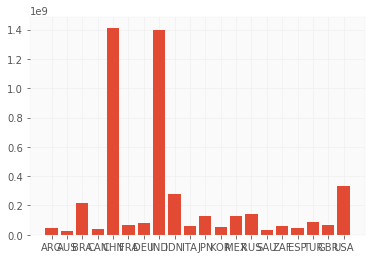

In [11]:
# Prepara a figura (fig) e a área do gráfico (ax)
fig, ax = plt.subplots()

# Plota o gráfico de barras
ax.bar(x = pop2021['Country Code'], height = pop2021['Value'])

# Exibe o gráfico
plt.show()

## 2: Ajusta o tamanho do gráfico para evitar sobreposição das siglas dos países no eixo X
* Parâmetro `figsize` da função `pyplot.subplots()`

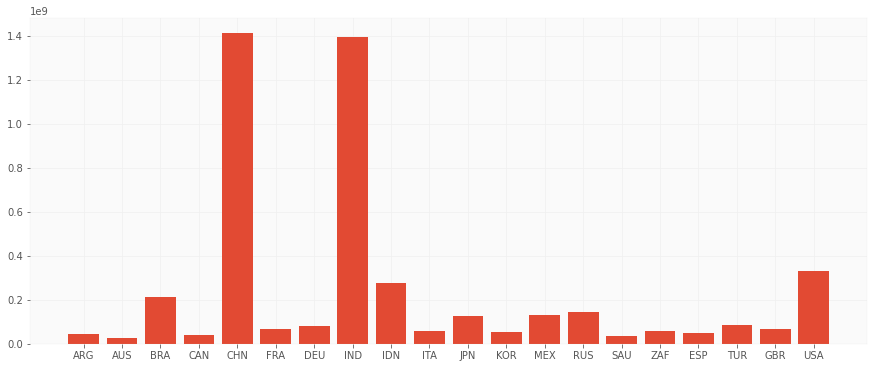

In [12]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
# Embora as dimensões sejam em polegadas, a princípio, o colab redimensiona mantendo a proporção
fig, ax = plt.subplots(figsize = (15, 6))

# Plota o gráfico de barras
ax.bar(x = pop2021['Country Code'], height = pop2021['Value'])

# Exibe o gráfico
plt.show()

## 3: Ajusta a ordem de grandeza para milhões
 * Divide o valor atribuído ao parâmetro `height` de `Axes.bar()` por `1000000` (ou o equivalente em notação científica: `1e6`)

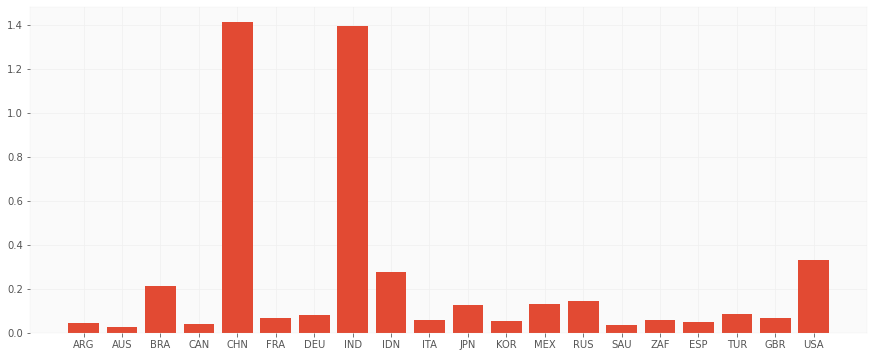

In [13]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (15, 6))

# Plota o gráfico de barras
ax.bar(x = pop2021['Country Code'], height = pop2021['Value']/1e9)

# Exibe o gráfico
plt.show()

## 4: Acrescenta título e rótulos dos eixos
 * Funções `pyplot.title()`, `pyplot.xlabel()` e `pyplot.ylabel()`
 * NOTE que a ordem de grandeza das barras está indicada no rótulo do eixo Y

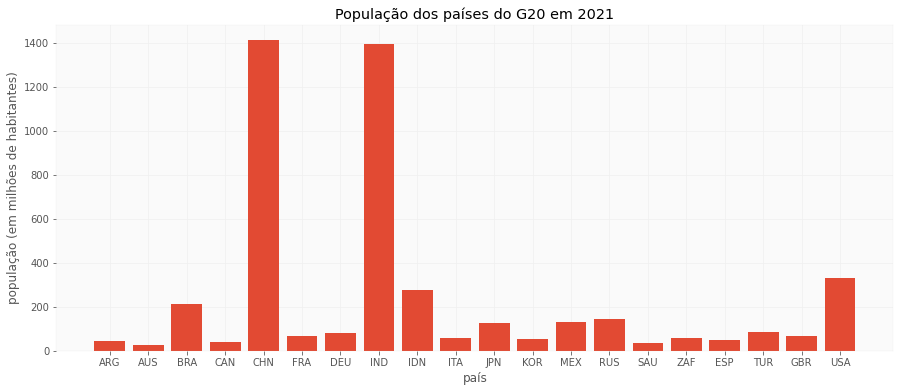

In [14]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (15, 6))

# Plota o gráfico de barras
ax.bar(x = pop2021['Country Code'], height = pop2021['Value']/1e6)

# Acrescenta um título ao gráfico
plt.title('População dos países do G20 em 2021')

# Define os rótulos dos eixos
plt.xlabel('país')
plt.ylabel('população (em milhões de habitantes)') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

## 4: Refina o gráfico, alterando a cor das barras e removendo o rótulo de país, que pode ser considerado desnecessário
 * Parâmetro `color` em `Axes.bar()`
 

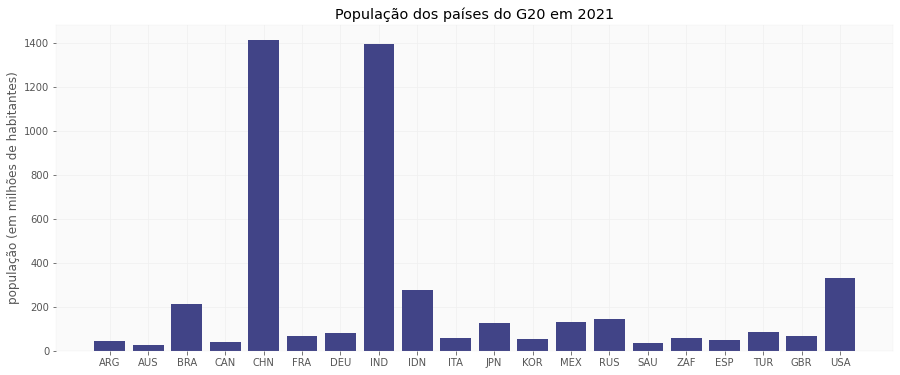

In [15]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (15, 6))

# Plota o gráfico de barras
ax.bar(x = pop2021['Country Code'], height = pop2021['Value']/1e6, color = corDefault)

# Acrescenta um título ao gráfico
plt.title('População dos países do G20 em 2021')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('população (em milhões de habitantes)') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

## 5: Salva o gráfico em diferentes formatos
* Função `pyplot.savefig()`
* NOTE que se deve salvar o gráfico antes de chamar `pyplot.show()`
* Considere armazenar os gráficos em formato vetorial (PDF ou SVG, por exemplo), para não perderem resolução em caso de redimensionamento
* Considere usar a função `pyplot.tight_layout()` para eliminar as margens desnecessárias, antes de salvar o gráfico

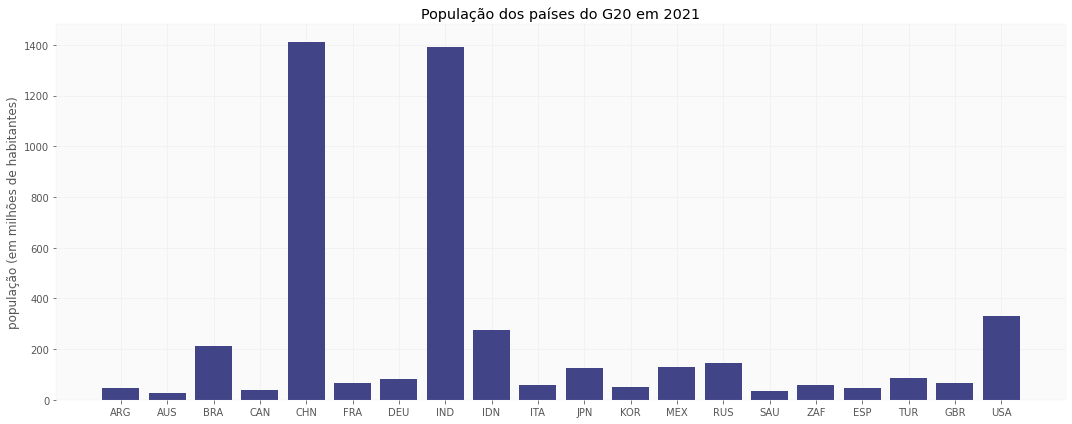

In [16]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (15, 6))

# Plota o gráfico de barras
ax.bar(x = pop2021['Country Code'], height = pop2021['Value']/1e6, color = corDefault)

# Acrescenta um título ao gráfico
plt.title('População dos países do G20 em 2021')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('população (em milhões de habitantes)') # é importante esclarecer a unidade e a ordem de grandeza

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("barras-alfa.pdf")
plt.savefig("barras-alfa.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("barras-alfa.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

## 6 (final): Acrescenta os valores das barras (usando a função `Axes.bar_label()`)

* Função `Axes.bar_label()` (requer versões mais atualizadas da biblioteca `matplotlib`)



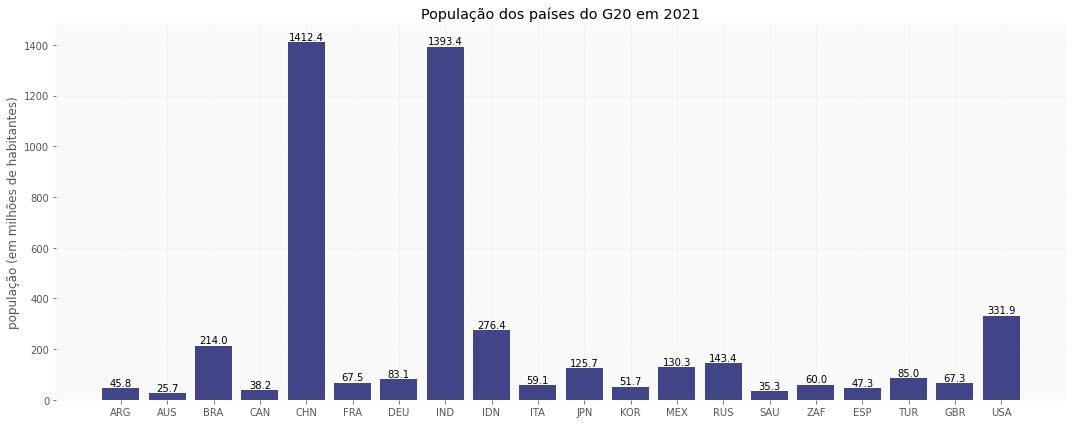

In [17]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (15, 6))

# Plota o gráfico de barras
ax.bar(x = pop2021['Country Code'], height = pop2021['Value']/1e6, color = corDefault)

# Acrescenta os valores sobre as barras
ax.bar_label(ax.containers[0], fmt="%.1f") # formatação do número com uma casa decimal

# Acrescenta um título ao gráfico
plt.title('População dos países do G20 em 2021')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('população (em milhões de habitantes)') # é importante esclarecer a unidade e a ordem de grandeza

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("barras-alfa.pdf")
plt.savefig("barras-alfa.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("barras-alfa.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

## 6b: Alternativa: Acrescenta os valores das barras sem usar a função `Axes.bar_label()`

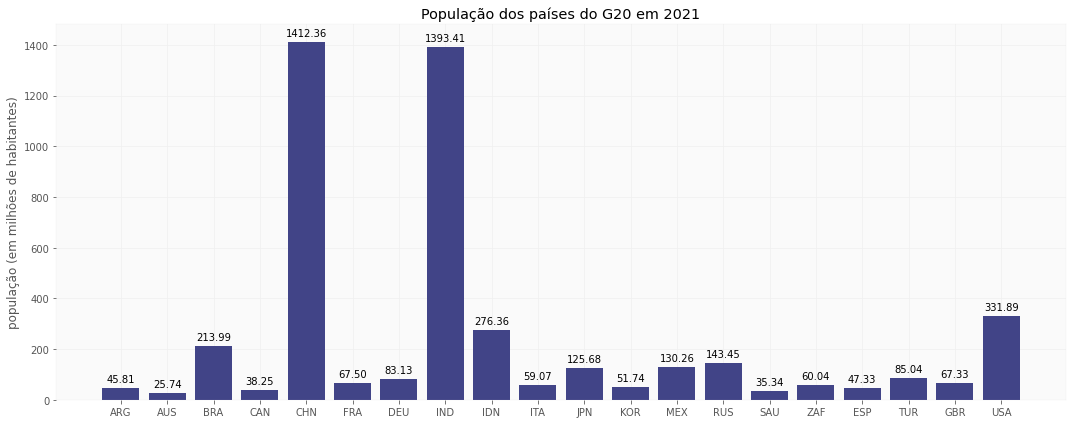

In [18]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (15, 6))

# Plota o gráfico de barras
b1 = ax.bar(x = pop2021['Country Code'], height = pop2021['Value']/1e6, color = corDefault)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    height = rect.get_height()
    ax.text(
        x = rect.get_x() + rect.get_width() / 2,     # posição x
        y = height + 15,                             # posição y
        s = "{:.2f}".format(height),                 # string com o valor
        ha = "center",                               # alinhamento na horizontal
        va = "bottom"                                # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('População dos países do G20 em 2021')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('população (em milhões de habitantes)') # é importante esclarecer a unidade e a ordem de grandeza

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("barras-alfa.pdf")
plt.savefig("barras-alfa.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("barras-alfa.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()


# Variação: Barras ordenadas por valor

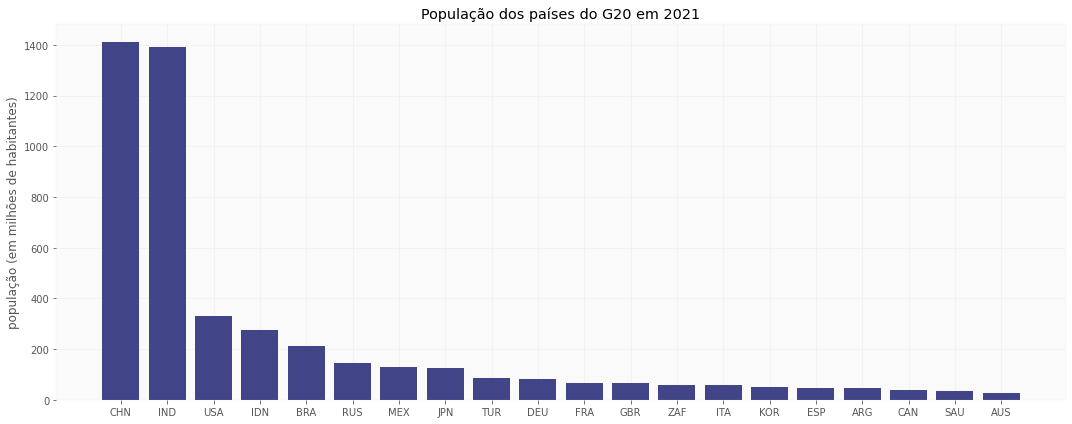

In [19]:
# Cria dataframe em ordem decrescente de valor
pop2021_ordem_valor = pop2021.sort_values(['Value'], ascending = False)

# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (15, 6))

# Plota o gráfico de barras
ax.bar(x = pop2021_ordem_valor['Country Code'], height = pop2021_ordem_valor['Value']/1e6, color = corDefault)

# Acrescenta um título ao gráfico
plt.title('População dos países do G20 em 2021')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('população (em milhões de habitantes)') # é importante esclarecer a unidade e a ordem de grandeza

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("barras-valor.pdf")
plt.savefig("barras-valor.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("barras-valor.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

# Variação: Barras ordenadas por valor, com a maior barra destacada

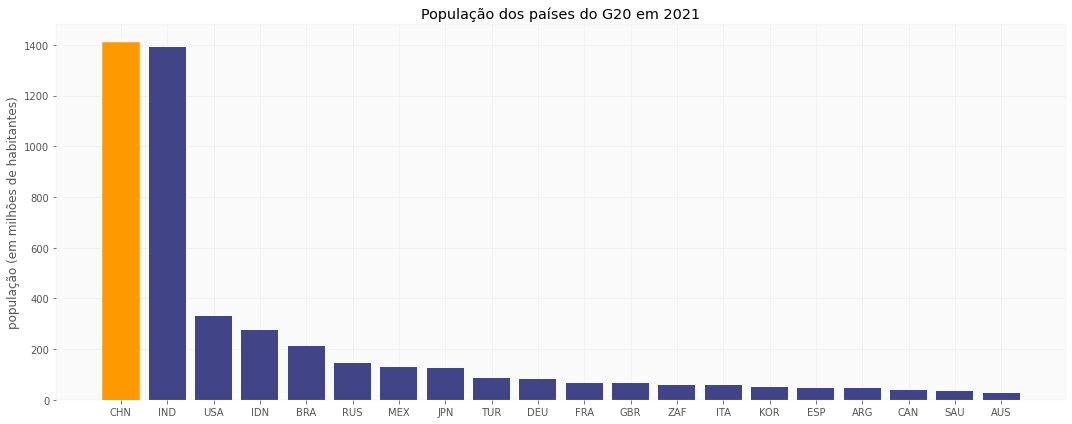

In [20]:
# Cria dataframe ordenado por valor
pop2021_ordem_valor = pop2021.sort_values(['Value'], ascending = False)

# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (15, 6))

# Plota o gráfico de barras
b1 = ax.bar(x = pop2021_ordem_valor['Country Code'], height = pop2021_ordem_valor['Value']/1e6, color = corDefault)

b1[0].set_color("#ff9900")

# Acrescenta um título ao gráfico
plt.title('População dos países do G20 em 2021')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('população (em milhões de habitantes)') # é importante esclarecer a unidade e a ordem de grandeza

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("barras-valor-destaque.pdf")
plt.savefig("barras-valor-destaque.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("barras-valor-destaque.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

# Variação: Gráfico de Barras Horizontais

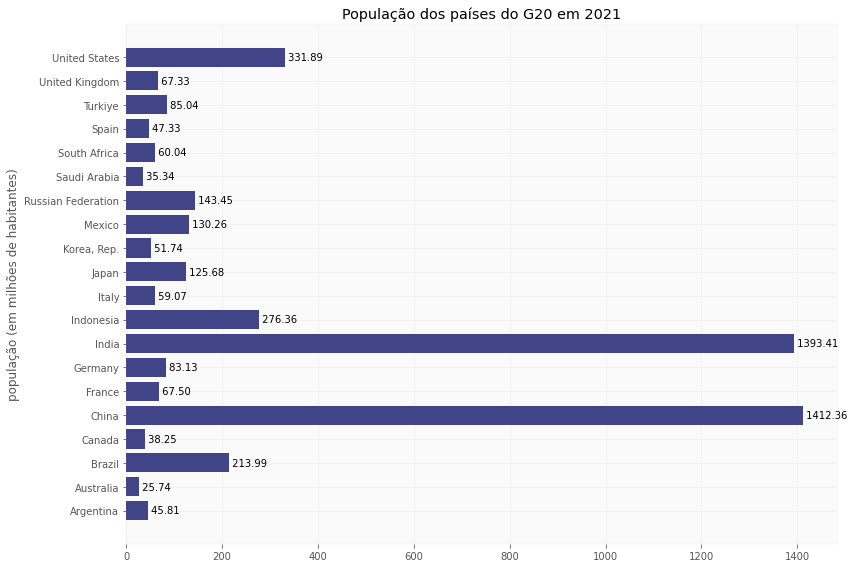

In [21]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 12 e altura 8 (em polegadas)
fig, ax = plt.subplots(figsize = (12, 8))

# Plota o gráfico de barras
b1 = ax.barh(y = pop2021['Country Name'], width = pop2021['Value']/1e6, color = corDefault)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    width = rect.get_width()
    ax.text(
        x = width,                             # posição x
        y = rect.get_y() + rect.get_height() / 2,   # posição y
        s = " {:.2f}".format(rect.get_width()),      # string com o valor
        ha = "left",                                # alinhamento na horizontal
        va = "center"                               # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('População dos países do G20 em 2021')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('população (em milhões de habitantes)') # é importante esclarecer a unidade e a ordem de grandeza


# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("barras-horiz.pdf")
plt.savefig("barras-horiz.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("barras-horiz.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

# Variação: Gráfico de Barras em Pequenos Múltiplos

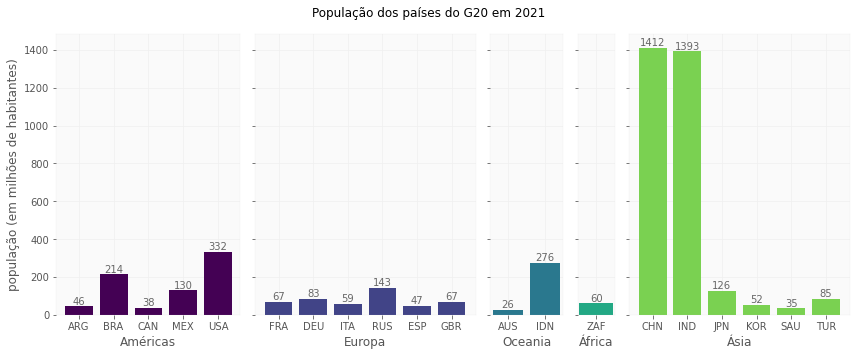

In [22]:
# Verifica quantos países há em cada continente
paisesPorContinente = pop2021.groupby(["Continent"]).size()

# Define base para gráficos: 1 linha com várias colunas:
# - ncols: número de colunas necessário para os continentes
# - gridspec_kw: define a largura de cada subplot de acordo com o número de países em cada continente
# - sharey: compartilha o eixo Y (parâmetro sharey), para permitir a comparação visual entre diferentes continentes
fig, axs = plt.subplots(nrows = 1, ncols = len(paisesPorContinente), 
                        figsize = (12, 5), 
                        sharey = "row",
                        gridspec_kw={"width_ratios": paisesPorContinente})

# Define gráficos de continentes para cada um dos slots definidos
for i in range(len(paisesPorContinente)):
    # Constrói gráfico de barra e Define label X com o continente associado
    axs[i].bar(x = pop2021[pop2021["Continent"] == paisesPorContinente.index[i]]["Country Code"],
               height = pop2021[pop2021["Continent"] == paisesPorContinente.index[i]]["Value"]/1e6, 
               color = coresViridis[i])
    # Exibe valores sobre cada barra
    axs[i].bar_label(axs[i].containers[0], fmt="%.0f", color="#666666")
    
    # Como indicar o continente associado a cada subplot?
    # Alternativa A: Define rótulo do eixo X de cada subplot com o continente associado
    axs[i].set(xlabel = paisesPorContinente.index[i])
    # Alternativa B: Define título do subplot com o continente associado
    # axs[i].set(title = continentes[i])

# Define rótulo do eixo Y somente para o primeiro plot 
# (por ser compartilhado com todos os gráficos daquela linha)
axs[0].set(ylabel = "população (em milhões de habitantes)")

# Define título superior comum para todos os gráficos
fig.suptitle("População dos países do G20 em 2021")

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Armazena o gráfico
plt.savefig("barras-cores-continente-peq-multiplos-sharedy.pdf")
plt.savefig("barras-cores-continente-peq-multiplos-sharedy.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()